# SHPSG - Main

* Input shape parameters: Ei, Fi, D2_8, D9_15

* Output: stl file for triangular surface mesh

## Load packages and functions

In [8]:
import numpy as np
import scipy.io as sio
from funcs import *
from SHPSG import *

## Define shape parameters

In [4]:
# particle form: elongation index and flatness index
Ei,Fi = 1,1

# particle roundness: large D2_8 means low roundness
D2_8 = [0.1]

# particle roughness: large D9_15 means low roughness
D9_15 = [0.0]

## Surface grids by icosahedron subdivision

In [5]:
# surface number: 20 @ level 0; 80 @ level 1; 320 @ level 2
level = 2
vertices, faces = icosahedron()
for i in range(level): 
    # subdivide surface
    vertices, faces = subdivsurf(faces,vertices)
    # remove duplicate vertices
    vertices, faces = cleanmesh(faces,vertices)
# convert from Cartesian to spherical coordinates
sph_cor = car2sph(vertices)

## Generate particle shapes

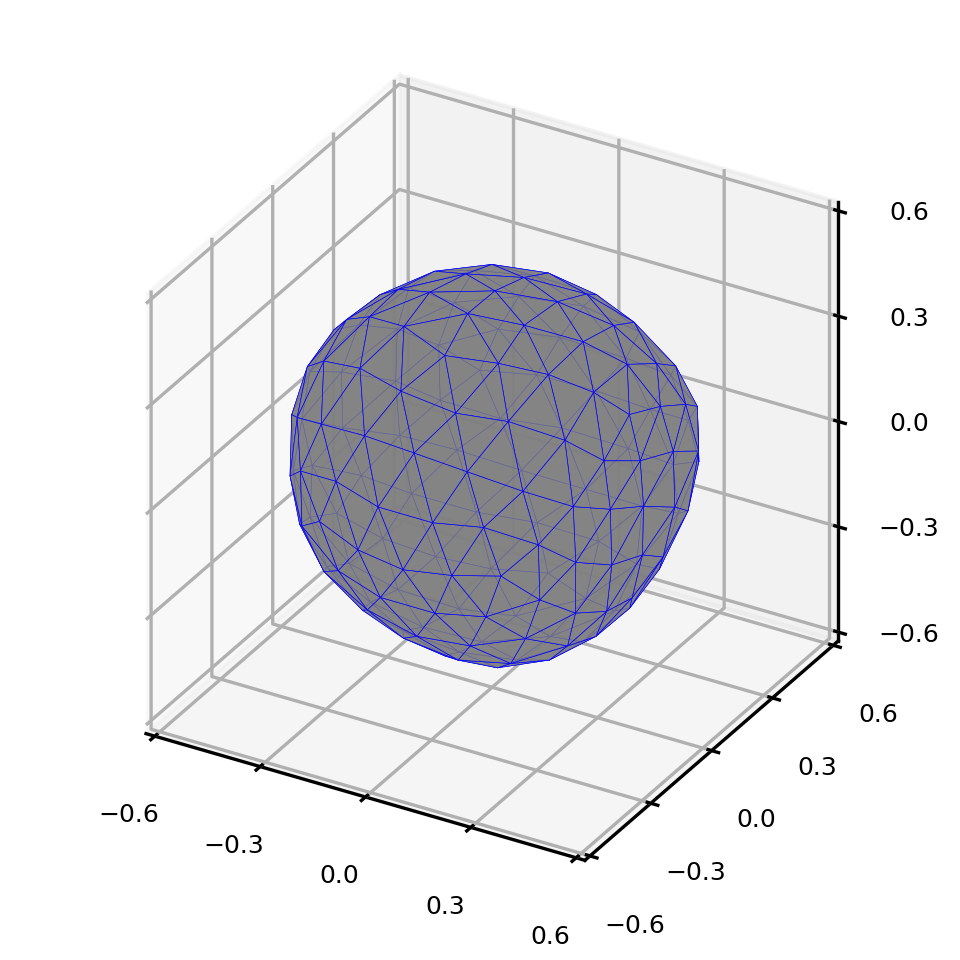

In [7]:
# number of particle for each group of parameters
npar = 1
for j in range(len(D2_8)):
    for k in range(len(D9_15)):
        for i in range(npar):
            # random generate SH coefficients
            coeff = SHPSG(Ei,Fi,D2_8[j],D9_15[k])
            # convert to spherical coordinates
            stlpath = './data/D2_8_'+str('%.2f' % D2_8[j])+'_par'+str(i)+'.stl'
            figpath = './data/D2_8_'+str('%.2f' % D2_8[j])+'_par'+str(i)+'.png'
            # export to stl files
            sh2stl(coeff, sph_cor, vertices, faces,stlpath)
            # visualize
            plotstl(stlpath,figpath)